In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# VIDEO FEED 
 
video = cv2.VideoCapture(0)   # 0 is the number of webcam 

while video.isOpened():       
      status, img = video.read()  # this will read the image of from video 
      cv2.imshow('video',img)     # it gives a popup on our feed which shows the image 
      if cv2.waitKey(10) & 0xFF == 27:
            break
video.release()
cv2.destroyAllWindows()


# 1.MAKE DETECTIONS 

- **setting up mediapipe instance** - we'vw added a pose estimation model through mediapipe and used it with a variable named pose 
- **Recolor Image** - this part is don because when we pass the image through mediapipe we want an RGB image 
- **Make detection** - in thsi part we are using our pose model variable to detect the image. By processing it we are going to get our detections back and store it in results 
- **Recoloring back to BGR** - we're recoloring our image back to bgr because we want to render our image in opencv and opencv want an image that is in BGR 
- **Render Detection** - by accessing results.pose_landmarks we can see what are the coordinate of different body point and by accessing mp_pose.Pose_Connection we're going to see how a landmark is mapped to different body parts.


In [3]:
video = cv2.VideoCapture(0)  
# setting up mediapipe instance 
with mp_pose.Pose(min_detection_confidence=0.8, min_tracking_confidence=0.8) as pose:    #importing Pose model as a variable pose
      while video.isOpened():       
            status, img = video.read()   
            # RECOLOR IMAGE
            image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make Detection
            results = pose.process(image)

            # recoloring image back to BGR 
            image.flags.writeable = True
            image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

            # RENDER DETECTION !!!! IMPORTANT !!!
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(82,49,111), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(184,29,95), thickness=2, circle_radius=2)
                                      )
            

            cv2.imshow('video',image)     
            if cv2.waitKey(10) & 0xFF == 27: 
                  break
video.release()
cv2.destroyAllWindows()


# 2. Determining Joints 
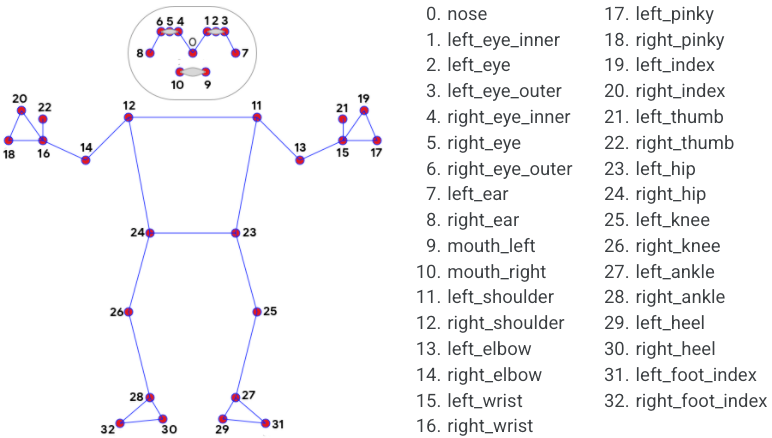

- **EXTRACTING LANDMARKS** - In this section we extract our landmarks through try and catch block so if we dont make any detections, it wont give any error 

In [4]:
video = cv2.VideoCapture(0)  
# setting up mediapipe instance 
with mp_pose.Pose(min_detection_confidence=0.8, min_tracking_confidence=0.8) as pose:    #importing Pose model as a variable pose
      while video.isOpened():       
            status, img = video.read()   
            # RECOLOR IMAGE
            image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make Detection
            results = pose.process(image)

            # recoloring image back to BGR 
            image.flags.writeable = True
            image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

            # Extracting Landmarks 
            try:
                  landmarks=results.pose_landmarks.landmark
                  print(landmarks)
            except:
                  pass      
            
            
            # RENDER DETECTION !!!! IMPORTANT !!!
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(82,49,111), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(184,29,95), thickness=2, circle_radius=2)
                                      )
            

            cv2.imshow('video',image)     
            if cv2.waitKey(10) & 0xFF == 27: 
                  break
video.release()
cv2.destroyAllWindows()


[x: 0.6200034618377686
y: 0.5112175941467285
z: -1.3456439971923828
visibility: 0.999667763710022
, x: 0.6456278562545776
y: 0.4305342435836792
z: -1.2431362867355347
visibility: 0.9995726943016052
, x: 0.6656621694564819
y: 0.43193694949150085
z: -1.2433669567108154
visibility: 0.9995895028114319
, x: 0.6846855878829956
y: 0.4323422610759735
z: -1.2434905767440796
visibility: 0.999523401260376
, x: 0.5734272599220276
y: 0.4257488250732422
z: -1.2716343402862549
visibility: 0.9995291233062744
, x: 0.5409713387489319
y: 0.4242051839828491
z: -1.2708109617233276
visibility: 0.9995285272598267
, x: 0.5129613876342773
y: 0.4237677752971649
z: -1.271480679512024
visibility: 0.9994889497756958
, x: 0.7029886841773987
y: 0.465927392244339
z: -0.561547577381134
visibility: 0.9996800422668457
, x: 0.4532608091831207
y: 0.45740747451782227
z: -0.6719290018081665
visibility: 0.9997524619102478
, x: 0.655328631401062
y: 0.5969271063804626
z: -1.0817557573318481
visibility: 0.9997162222862244
, x: 

In [5]:
# to find the value of any body part for eg right shoulder 
mp_pose.PoseLandmark.RIGHT_SHOULDER.value

12

# 3. Calculate Angles 

In [6]:
def calculate_angle(a,b,c):
    a=np.array(a) #First
    b=np.array(b) # mid
    c=np.array(c) #End

    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/ np.pi) 

    if angle > 180.0:
      angle = 360-angle

      return angle

In [7]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [8]:
calculate_angle(shoulder,elbow,wrist)

174.55331950247

## Biceps Curl 


In [9]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Curl Counter Vaariables 
counter = 0 
stage = None


# Single Arm Curling      
def calculate_sqauts_angle(a,b,c):
      a=np.array(a) #First
      b=np.array(b) # mid
      c=np.array(c) #End

      radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
      angle = np.abs(radians*180.0/ np.pi) 

      if angle > 180.0:
            angle = 360-angle
      return angle

# Double Arm Curling
def calculate_both_squats(left=[],right=[]):
      left_angle = calculate_sqauts_angle(left[0],left[1],left[2])
      right_angle = calculate_sqauts_angle(right[0],right[1],right[2])
      print(f'Left Angle: {left_angle} Right Angle: {right_angle}')
      return left_angle,right_angle

# Getting Coordinates of joints 
def get_coords(landmarks,point):
      return  [landmarks[point.value].x,landmarks[point.value].y]

# Visualizing Text
def render_bicep_curl(image,points,win_size=[640,480]):
      white = (255,255,255)
      cv2.putText(image,f'{points["elbow"]:.1f}',tuple(np.multiply(points["elbow"],win_size).astype(int)),cv2.FONT_HERSHEY_SIMPLEX, 0.5,white,2, cv2.LINE_AA)
      cv2.circle(image,tuple(np.multiply(points["elbow"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.circle(image,tuple(np.multiply(points["shoulder"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.circle(image,tuple(np.multiply(points["wrist"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.line(image,tuple(np.multiply(points["elbow"],[640,480]).astype(int)),tuple(np.multiply(points["shoulder"],[640,480]).astype(int)),white,2)
      cv2.line(image,tuple(np.multiply(points["wrist"],[640,480]).astype(int)),tuple(np.multiply(points["elbow"],[640,480]).astype(int)),white,2)

     

def show_excercise(video, ex=2, min_detection_confidence=0.5, min_tracking_confidence=0.5, *points):
      global counter,stage
      with mp_pose.Pose(min_detection_confidence=min_detection_confidence, min_tracking_confidence=min_tracking_confidence) as pose:    #importing Pose model as a variable pose
            while video.isOpened():       
                  state,image = video.read()  
                  
                  # RECOLOR IMAGE
                  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                  image.flags.writeable = False

                  # Make Detection
                  results = pose.process(image)

                  # recoloring image back to BGR 
                  image.flags.writeable = True
                  image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

                  # Extracting Landmarks 
                  try:


                        landmarks=results.pose_landmarks.landmark
                        # print(f'Landmarks : {landmarks}')
                        if len(landmarks)>0:
                              # Getting Coordinates
                              joints = {}
                              if len(points) == 3 and ex==1:
                                    for name, point in points.items():
                                          joints[name] = get_coords(landmarks,point)
                                    
                                    angle = calculate_sqauts_angle(joints['Hip'],joints['Knee'],joints['Ankle'])
                                    
                                    #Visualize Text 
                                    render_bicep_curl(img,results,points)

                        
                                    # Curl Counter Logic 
                                    if angle > 160:
                                          stage= "Up" 
                                    if angle < 90  and stage == "Up":
                                          stage= "Down"
                                          counter += 1
                                          print(counter)
                              

                              if len(points) == 6 and ex==2:
                                    left_shoulder = [landmarks[points[0].value].x,landmarks[points[0].value].y]
                                    left_elbow = [landmarks[points[1].value].x,landmarks[points[1].value].y]
                                    left_wrist = [landmarks[points[2].value].x,landmarks[points[2].value].y]
                                    right_shoulder = [landmarks[points[3].value].x,landmarks[points[3].value].y]
                                    right_elbow = [landmarks[points[4].value].x,landmarks[points[4].value].y]
                                    right_wrist = [landmarks[points[5].value].x,landmarks[points[5].value].y]
                              print(f'Left Shoulder: {left_shoulder} Left Elbow: {left_elbow} Left Wrist: {left_wrist}')
                              # Calculating Angles
                              left_angle,right_angle = calculate_both_squats([left_shoulder,left_elbow,left_wrist],[right_shoulder,right_elbow,right_wrist])
                              cv2.putText(image,f'{left_angle:.1f}',
                                          tuple(np.multiply(left_elbow,[640,480]).astype(int)),
                                          cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2, cv2.LINE_AA)
                              cv2.putText(image,f'{right_angle:.1f}',
                                          tuple(np.multiply(right_elbow,[640,480]).astype(int)),
                                          cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2, cv2.LINE_AA)
                              cv2.circle(image,tuple(np.multiply(left_elbow,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(left_shoulder,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(left_wrist,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.line(image,tuple(np.multiply(left_elbow,[640,480]).astype(int)),tuple(np.multiply(left_shoulder,[640,480]).astype(int)),(255,255,255),2)
                              cv2.line(image,tuple(np.multiply(left_wrist,[640,480]).astype(int)),tuple(np.multiply(left_elbow,[640,480]).astype(int)),(255,255,255),2)
                              cv2.circle(image,tuple(np.multiply(right_elbow,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(right_shoulder,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(right_wrist,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.line(image,tuple(np.multiply(right_elbow,[640,480]).astype(int)),tuple(np.multiply(right_shoulder,[640,480]).astype(int)),(255,255,255),2)
                              cv2.line(image,tuple(np.multiply(right_wrist,[640,480]).astype(int)),tuple(np.multiply(right_elbow,[640,480]).astype(int)),(255,255,255),2)
                              

                              # Curl Counter Logic
                              
                              if left_angle > 160 and right_angle > 160:
                                    stage= "Down"
                              if left_angle < 55 and right_angle < 55 and stage == "Down":
                                    stage= "Up"
                                    counter += 1
                                    print(counter)  
                        else: print("No pose detected")

                  except:
                        pass      

                  # Render curl counter
                  # Setup status box
                  cv2.rectangle(image, (0,0), (235,80), (249,186,30), -1)           #230,20,150
                  
                  # Rep data
                  cv2.putText(image, 'REPS', (15,12), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                  cv2.putText(image, str(counter), (10,60), 
                              cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
                  
                  # Stage data
                  cv2.putText(image, 'STAGE', (75,12), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                  cv2.putText(image, stage, 
                              (60,60), 
                              cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv2.LINE_AA)


                  # Render Detection
                  # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                  #                         mp_drawing.DrawingSpec(color=(82,49,111), thickness=2, circle_radius=2),
                  #                         mp_drawing.DrawingSpec(color=(184,29,95), thickness=2, circle_radius=2)
                  #                         )

                                          

                  cv2.imshow('video',image)

                  if cv2.waitKey(10) & 0xFF == 27: 
                        video.release()
                        cv2.destroyAllWindows()
                        break



In [10]:
video = cv2.VideoCapture(0)  
# left bicep curl
# show_excercise(video,1,mp_pose.PoseLandmark.LEFT_SHOULDER,mp_pose.PoseLandmark.LEFT_ELBOW,mp_pose.PoseLandmark.LEFT_WRIST)
# right bicep curl
# show_excercise(video,mp_pose.PoseLandmark.RIGHT_SHOULDER,mp_pose.PoseLandmark.RIGHT_ELBOW,mp_pose.PoseLandmark.RIGHT_WRIST)
# both bicep curl
show_excercise(video,
               2,
               .5,
               .5,
               mp_pose.PoseLandmark.LEFT_SHOULDER,
               mp_pose.PoseLandmark.LEFT_ELBOW,
               mp_pose.PoseLandmark.LEFT_WRIST,
               mp_pose.PoseLandmark.RIGHT_SHOULDER,
               mp_pose.PoseLandmark.RIGHT_ELBOW,
               mp_pose.PoseLandmark.RIGHT_WRIST)

Left Shoulder: [0.8102189898490906, 0.8890981674194336] Left Elbow: [0.8922981023788452, 1.372711420059204] Left Wrist: [0.8878742456436157, 1.7382540702819824]
Left Angle: 169.67414735406334 Right Angle: 172.7006840154165
Left Shoulder: [0.8111158609390259, 0.8887590169906616] Left Elbow: [0.8926035165786743, 1.351745367050171] Left Wrist: [0.8926847577095032, 1.729041337966919]
Left Angle: 170.03026087274986 Right Angle: 170.04429981050086
Left Shoulder: [0.8111902475357056, 0.8882762789726257] Left Elbow: [0.892602264881134, 1.3305952548980713] Left Wrist: [0.8953039050102234, 1.7176177501678467]
Left Angle: 169.97096943747275 Right Angle: 166.8919381453563
Left Shoulder: [0.8106114268302917, 0.8875719904899597] Left Elbow: [0.8902193903923035, 1.3263840675354004] Left Wrist: [0.8955512046813965, 1.7141730785369873]
Left Angle: 170.50513174238776 Right Angle: 165.92438680388798
Left Shoulder: [0.8106364011764526, 0.887474775314331] Left Elbow: [0.8881357312202454, 1.3262792825698853

In [15]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Curl Counter Vaariables 
counter = 0 
stage = None


# Single Arm Curling      
def calculate_sqauts_angle(a,b,c):
      a=np.array(a) #First
      b=np.array(b) # mid
      c=np.array(c) #End

      radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
      angle = np.abs(radians*180.0/ np.pi) 

      if angle > 180.0:
            angle = 360-angle
      return angle

# Double Arm Curling
def calculate_both_squats(left=[],right=[]):
      left_angle = calculate_sqauts_angle(left[0],left[1],left[2])
      right_angle = calculate_sqauts_angle(right[0],right[1],right[2])
      print(f'Left Angle: {left_angle} Right Angle: {right_angle}')
      return left_angle,right_angle

# Getting Coordinates of joints 
def get_coords(landmarks,point):
      return  [landmarks[point.value].x,landmarks[point.value].y]

# Visualizing Text
def render_bicep_curl(image,points,win_size=[640,480]):
      white = (255,255,255)
      cv2.putText(image,f'{points["elbow"]:.1f}',tuple(np.multiply(points["elbow"],win_size).astype(int)),cv2.FONT_HERSHEY_SIMPLEX, 0.5,white,2, cv2.LINE_AA)
      cv2.circle(image,tuple(np.multiply(points["hip"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.circle(image,tuple(np.multiply(points["Knee"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.circle(image,tuple(np.multiply(points["Ankle"],[640,480]).astype(int)),5,white,cv2.FILLED)
      cv2.line(image,tuple(np.multiply(points["Knee"],[640,480]).astype(int)),tuple(np.multiply(points["Hip"],[640,480]).astype(int)),white,2)
      cv2.line(image,tuple(np.multiply(points["Knee"],[640,480]).astype(int)),tuple(np.multiply(points["Ankle"],[640,480]).astype(int)),white,2)

     

def show_excercise(video, ex=2, min_detection_confidence=0.5, min_tracking_confidence=0.5, *points):
      global counter,stage
      with mp_pose.Pose(min_detection_confidence=min_detection_confidence, min_tracking_confidence=min_tracking_confidence) as pose:    #importing Pose model as a variable pose
            while video.isOpened():       
                  state,image = video.read()  
                  
                  # RECOLOR IMAGE
                  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                  image.flags.writeable = False

                  # Make Detection
                  results = pose.process(image)

                  # recoloring image back to BGR 
                  image.flags.writeable = True
                  image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

                  # Extracting Landmarks 
                  try:


                        landmarks=results.pose_landmarks.landmark
                        # print(f'Landmarks : {landmarks}')
                        if len(landmarks)>0:
                              # Getting Coordinates
                              joints = {}
                              if len(points) == 3 and ex==1:
                                    for name, point in points.items():
                                          joints[name] = get_coords(landmarks,point)
                                    
                                    angle = calculate_sqauts_angle(joints['Knee'],joints['Hip'],joints['Ankle'])
                                    
                                    #Visualize Text 
                                    render_bicep_curl(img,results,points)

                        
                                    # Curl Counter Logic 
                                    if angle > 160:
                                          stage= "Up" 
                                    if angle < 90 and stage == "Up":
                                          stage= "Down"
                                          counter += 1
                                          print(counter)
                              

                              if len(points) == 6 and ex==2:
                                    left_knee = [landmarks[points[0].value].x,landmarks[points[0].value].y]
                                    left_hip = [landmarks[points[1].value].x,landmarks[points[1].value].y]
                                    left_ankle = [landmarks[points[2].value].x,landmarks[points[2].value].y]
                                    right_knee = [landmarks[points[3].value].x,landmarks[points[3].value].y]
                                    right_hip = [landmarks[points[4].value].x,landmarks[points[4].value].y]
                                    right_ankle = [landmarks[points[5].value].x,landmarks[points[5].value].y]
                              print(f'Left Knee: {left_knee} Left Ankle: {left_ankle} Left Hip: {left_hip}')
                              # Calculating Angles
                              left_angle,right_angle = calculate_both_squats([left_hip,left_knee,left_ankle],[right_hip,right_knee,right_ankle])
                              cv2.putText(image,f'{left_angle:.1f}',
                                          tuple(np.multiply(left_knee,[640,480]).astype(int)),
                                          cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2, cv2.LINE_AA)
                              cv2.putText(image,f'{right_angle:.1f}',
                                          tuple(np.multiply(right_knee,[640,480]).astype(int)),
                                          cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2, cv2.LINE_AA)
                              cv2.circle(image,tuple(np.multiply(left_hip,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(left_knee,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(left_ankle,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.line(image,tuple(np.multiply(left_hip,[640,480]).astype(int)),tuple(np.multiply(left_knee,[640,480]).astype(int)),(255,255,255),2)
                              cv2.line(image,tuple(np.multiply(left_knee,[640,480]).astype(int)),tuple(np.multiply(left_hip,[640,480]).astype(int)),(255,255,255),2)
                              cv2.circle(image,tuple(np.multiply(right_hip,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(right_knee,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.circle(image,tuple(np.multiply(right_ankle,[640,480]).astype(int)),5,(255,255,255),cv2.FILLED)
                              cv2.line(image,tuple(np.multiply(right_hip,[640,480]).astype(int)),tuple(np.multiply(right_knee,[640,480]).astype(int)),(255,255,255),2)
                              cv2.line(image,tuple(np.multiply(right_knee,[640,480]).astype(int)),tuple(np.multiply(right_hip,[640,480]).astype(int)),(255,255,255),2)
                              

                              # Curl Counter Logic
                              
                              if left_angle > 160 and right_angle > 160:
                                    stage= "Up"
                              if left_angle < 90 and right_angle < 90 and stage == "Up":
                                    stage= "Down"
                                    counter += 1
                                    print(counter)  
                        else: print("No pose detected")

                  except:
                        pass      

                  # Render curl counter
                  # Setup status box
                  cv2.rectangle(image, (0,0), (235,80), (249,186,30), -1)           #230,20,150
                  
                  # Rep data
                  cv2.putText(image, 'REPS', (15,12), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                  cv2.putText(image, str(counter), (10,60), 
                              cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
                  
                  # Stage data
                  cv2.putText(image, 'STAGE', (75,12), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                  cv2.putText(image, stage, 
                              (60,60), 
                              cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv2.LINE_AA)


                  # Render Detection
                  # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                  #                         mp_drawing.DrawingSpec(color=(82,49,111), thickness=2, circle_radius=2),
                  #                         mp_drawing.DrawingSpec(color=(184,29,95), thickness=2, circle_radius=2)
                  #                         )

                                          

                  cv2.imshow('video',image)

                  if cv2.waitKey(10) & 0xFF == 27: 
                        video.release()
                        cv2.destroyAllWindows()
                        break



In [16]:
video = cv2.VideoCapture(0)  
# left bicep curl
# show_excercise(video,1,mp_pose.PoseLandmark.LEFT_SHOULDER,mp_pose.PoseLandmark.LEFT_ELBOW,mp_pose.PoseLandmark.LEFT_WRIST)
# right bicep curl
# show_excercise(video,mp_pose.PoseLandmark.RIGHT_SHOULDER,mp_pose.PoseLandmark.RIGHT_ELBOW,mp_pose.PoseLandmark.RIGHT_WRIST)
# both bicep curl
show_excercise(video,
               2,
               .5,
               .5,
               mp_pose.PoseLandmark.LEFT_HIP,
               mp_pose.PoseLandmark.LEFT_KNEE,
               mp_pose.PoseLandmark.LEFT_ANKLE,
               mp_pose.PoseLandmark.RIGHT_HIP,
               mp_pose.PoseLandmark.RIGHT_KNEE,
               mp_pose.PoseLandmark.RIGHT_ANKLE)

Left Knee: [0.2681558132171631, 1.9407260417938232] Left Ankle: [0.37298980355262756, 3.6825265884399414] Left Hip: [0.3238379657268524, 2.8531906604766846]
Left Angle: 0.04776764098518405 Right Angle: 1.4815554086998015
Left Knee: [0.2684366703033447, 1.9464077949523926] Left Ankle: [0.32370704412460327, 3.6795501708984375] Left Hip: [0.31062108278274536, 2.8600800037384033]
Left Angle: 0.81692059739843 Right Angle: 0.1899000277259637
Left Knee: [0.2766355872154236, 1.9408904314041138] Left Ankle: [0.35542958974838257, 3.655470132827759] Left Hip: [0.34417983889579773, 2.8533284664154053]
Left Angle: 1.6024696991359877 Right Angle: 1.0171212133580485
Left Knee: [0.27946245670318604, 1.9376871585845947] Left Ankle: [0.3517971634864807, 3.6376426219940186] Left Hip: [0.34142714738845825, 2.845949649810791]
Left Angle: 1.4663415115558047 Right Angle: 0.6668116427890528
Left Knee: [0.2689519226551056, 1.9393070936203003] Left Ankle: [0.3243711590766907, 3.6384637355804443] Left Hip: [0.31